In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time as time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Path to your SPSS file
file_path = "C:\\Users\\1221\\Desktop\\Internship\\Internship\\data\\EmONC Master Dataset_Final.sav"

# Read the SPSS file
df = pd.read_spss(file_path)

# Display the first few rows of the dataframe
df

,Q001,qday,qmonth,qyear,qinterviewer,Q003,HF_Name,Q005,Q005_NAME,Q006,...,ambulance_4w_any,anycom,transport_motor_any,mwh,HR_BEmONC_Ready,HR_CEmONC_Ready,DES_BEmONC_Ready,DES_CEmONC_Ready,Readiness_BEmONC,Readiness_CEmONC
0,2.0,26.0,April,2016.0,11.0,Alation Hospital,Alation Hospital,snnp,SNNPR,77.0,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN
1,1001.0,31.0,August,2016.0,3.0,Abiadi Health center,Abiadi Health Center,Tigray,TIGRAY,1.0,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN
2,1002.0,31.0,August,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,Tigray,TIGRAY,1.0,...,Yes,Yes,Yes,No,1.0,1.0,1.0,NaN,1.0,NaN
3,1003.0,31.0,August,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,Tigray,TIGRAY,1.0,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
4,1004.0,21.0,September,2016.0,4.0,Adi hadem Health center,Adi Hadem Health Center,Tigray,TIGRAY,1.0,...,No,No,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,8834.0,16.0,May,2016.0,51.0,Adama General Hospital and Med,Adama General Hospital And Med,Oromiya,OROMIYA,26.0,...,Yes,Yes,Yes,No,1.0,1.0,NaN,NaN,NaN,NaN
3800,8837.0,16.0,May,2016.0,57.0,St Fransicco Health Center,St Fransicco Health Center,Oromiya,OROMIYA,32.0,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
3801,8839.0,7.0,October,2016.0,21.0,Woreda 12 ealth center,Woreda 12 Ealth Center,Addis Ababa,ADDIS ABABA,103.0,...,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN
3802,8841.0,16.0,May,2016.0,46.0,FGAE Adama model Clinic,FGAE Adama Model Clinic,Oromiya,OROMIYA,26.0,...,Yes,Yes,Yes,No,1.0,1.0,NaN,NaN,NaN,NaN


In [49]:
# Read the SPSS file
df, meta = pyreadstat.read_sav(file_path)

# Extract variable names and corresponding labels (metadata)
variable_info = meta.column_names_to_labels

# Print all column names and labels
print("All variable names and labels:")

#for col, label in variable_info.items():
#    print(f'{col}: {label}')

All variable names and labels:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Columns: 3607 entries, Q001 to Readiness_CEmONC
dtypes: float64(3422), object(185)
memory usage: 104.7+ MB


In [5]:
#summary of statistics for a DataFrame's numeric columns of selected variables 
df.describe()

,Q001,qday,qmonth,qyear,qinterviewer,Q005,Q006,Q006_1,Q007,FT2,...,ambulance_4w_any,anycom,transport_motor_any,mwh,HR_BEmONC_Ready,HR_CEmONC_Ready,DES_BEmONC_Ready,DES_CEmONC_Ready,Readiness_BEmONC,Readiness_CEmONC
count,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,0.0,3804.000000,3804.000000,...,3804.000000,3798.000000,3804.000000,3804.000000,460.0,210.0,219.0,45.0,173.0,35.0
mean,3320.723975,16.103312,7.589380,2016.000263,32.281283,4.752629,43.547319,NaN,3.904837,1.916930,...,0.174290,0.356767,0.337802,0.526025,1.0,1.0,1.0,1.0,1.0,1.0
std,1591.061683,8.943660,1.644488,0.016214,17.474485,2.770863,27.266579,NaN,0.515740,0.276025,...,0.379409,0.479108,0.473023,0.499388,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,1.000000,2.000000,2016.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
25%,2158.750000,8.000000,6.000000,2016.000000,18.000000,3.000000,23.000000,NaN,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
50%,3180.500000,17.000000,8.000000,2016.000000,33.000000,4.000000,37.000000,NaN,4.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
75%,4216.250000,24.000000,9.000000,2016.000000,47.000000,7.000000,69.000000,NaN,4.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
max,8842.000000,31.000000,12.000000,2017.000000,62.000000,15.000000,105.000000,NaN,7.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
# Count the number of null values per column
null_counts = df.isnull().sum()
null_counts

Q001                   0
qday                   0
qmonth                 0
qyear                  0
qinterviewer           0
                    ... 
HR_CEmONC_Ready     3594
DES_BEmONC_Ready    3585
DES_CEmONC_Ready    3759
Readiness_BEmONC    3631
Readiness_CEmONC    3769
Length: 3607, dtype: int64

In [7]:
# Rename columns with variable names 
df.columns = [variable_info.get(col, col) for col in df.columns]

df

,Facility number,Date- Day,Date- Month,Date- Year,Interviewer number,Name of facility,Facility name - clean format,Region/Province,Region name,Zone/Sub-city,...,any functioning 4 wheeled motorized ambulance,Has at least one form of communication (telephone/ radio),Any functioning motorized transport,facility has maternity waiting home or room,None,None,None,None,None,None
0,2.0,26.0,4.0,2016.0,11.0,Alation Hospital,Alation Hospital,7.0,SNNPR,77.0,...,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1001.0,31.0,8.0,2016.0,3.0,Abiadi Health center,Abiadi Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1002.0,31.0,8.0,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,1.0,TIGRAY,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,NaN
3,1003.0,31.0,8.0,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,1.0,TIGRAY,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1004.0,21.0,9.0,2016.0,4.0,Adi hadem Health center,Adi Hadem Health Center,1.0,TIGRAY,1.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,8834.0,16.0,5.0,2016.0,51.0,Adama General Hospital and Med,Adama General Hospital And Med,4.0,OROMIYA,26.0,...,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
3800,8837.0,16.0,5.0,2016.0,57.0,St Fransicco Health Center,St Fransicco Health Center,4.0,OROMIYA,32.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3801,8839.0,7.0,10.0,2016.0,21.0,Woreda 12 ealth center,Woreda 12 Ealth Center,14.0,ADDIS ABABA,103.0,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3802,8841.0,16.0,5.0,2016.0,46.0,FGAE Adama model Clinic,FGAE Adama Model Clinic,4.0,OROMIYA,26.0,...,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN


In [8]:
# Collect duplicate column names
duplicate_columns = [col for col in df.columns if df.columns.tolist().count(col) > 1]

# Drop duplicate columns, keeping only the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

df

,Facility number,Date- Day,Date- Month,Date- Year,Interviewer number,Name of facility,Facility name - clean format,Region/Province,Region name,Zone/Sub-city,...,emonc status comp/basic/partial,EmONC Grading,EmNeC Status,EmNeC Grading,years since receiving professional qualification,professional qualification categorized,any functioning 4 wheeled motorized ambulance,Has at least one form of communication (telephone/ radio),Any functioning motorized transport,facility has maternity waiting home or room
0,2.0,26.0,4.0,2016.0,11.0,Alation Hospital,Alation Hospital,7.0,SNNPR,77.0,...,3.0,5.0,0.0,5.0,10.916667,2.0,1.0,1.0,1.0,0.0
1,1001.0,31.0,8.0,2016.0,3.0,Abiadi Health center,Abiadi Health Center,1.0,TIGRAY,1.0,...,3.0,5.0,1.0,4.0,6.166667,2.0,1.0,1.0,1.0,0.0
2,1002.0,31.0,8.0,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,1.0,TIGRAY,1.0,...,1.0,1.0,1.0,2.0,7.000000,2.0,1.0,1.0,1.0,0.0
3,1003.0,31.0,8.0,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,1.0,TIGRAY,1.0,...,3.0,5.0,1.0,4.0,5.000000,2.0,0.0,0.0,0.0,0.0
4,1004.0,21.0,9.0,2016.0,4.0,Adi hadem Health center,Adi Hadem Health Center,1.0,TIGRAY,1.0,...,3.0,3.0,1.0,3.0,3.000000,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,8834.0,16.0,5.0,2016.0,51.0,Adama General Hospital and Med,Adama General Hospital And Med,4.0,OROMIYA,26.0,...,3.0,4.0,1.0,3.0,6.000000,2.0,1.0,1.0,1.0,0.0
3800,8837.0,16.0,5.0,2016.0,57.0,St Fransicco Health Center,St Fransicco Health Center,4.0,OROMIYA,32.0,...,3.0,4.0,1.0,4.0,2.000000,3.0,0.0,0.0,0.0,0.0
3801,8839.0,7.0,10.0,2016.0,21.0,Woreda 12 ealth center,Woreda 12 Ealth Center,14.0,ADDIS ABABA,103.0,...,2.0,2.0,1.0,3.0,1.000000,2.0,0.0,1.0,0.0,0.0
3802,8841.0,16.0,5.0,2016.0,46.0,FGAE Adama model Clinic,FGAE Adama Model Clinic,4.0,OROMIYA,26.0,...,3.0,3.0,1.0,4.0,9.000000,2.0,1.0,1.0,1.0,0.0


In [9]:
# List of column names selected
column_names=["Was labor augmented","Mode of delivery","Pretreatment bp systolic","Pretreatment bp diastolic",
              "Complications in previous pregnancy","Age","Parity of index pregnanacy", "Episiotomy","Experience seizures", 
              "Week of gestation","Delayed arrival to health facility","Delay in correct diagnosis","Weight of newborn at birth",
              "Duration of labour in hour","Woman / baby was referred from another facility","Region/Province", "Urban/rural", "Cause pph"]

df = pd.DataFrame(df, columns=column_names)
# Extract specified columns
df

,Was labor augmented,Mode of delivery,Pretreatment bp systolic,Pretreatment bp diastolic,Complications in previous pregnancy,Age,Parity of index pregnanacy,Episiotomy,Experience seizures,Week of gestation,Delayed arrival to health facility,Delay in correct diagnosis,Weight of newborn at birth,Duration of labour in hour,Woman / baby was referred from another facility,Region/Province,Urban/rural,Cause pph
0,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,9999.0,0.0,7.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,9999.0,0.0,1.0,1.0,NaN
2,0.0,9.0,100.0,65.0,88.0,25.0,1.0,0.0,0.0,99.0,0.0,1.0,3000.0,9999.0,1.0,1.0,1.0,9.0
3,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,7777.0,NaN,NaN,1.0,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,7777.0,NaN,NaN,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,0.0,3.0,110.0,80.0,0.0,28.0,1.0,0.0,0.0,NaN,NaN,NaN,1800.0,9.0,0.0,4.0,1.0,1.0
3800,0.0,1.0,90.0,60.0,0.0,28.0,2.0,0.0,0.0,NaN,NaN,NaN,2800.0,19.0,0.0,4.0,1.0,9.0
3801,0.0,1.0,100.0,60.0,0.0,27.0,1.0,0.0,NaN,NaN,NaN,NaN,3500.0,3.0,0.0,14.0,1.0,9.0
3802,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,9999.0,0.0,4.0,1.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Was labor augmented                              935 non-null    float64
 1   Mode of delivery                                 935 non-null    float64
 2   Pretreatment bp systolic                         935 non-null    float64
 3   Pretreatment bp diastolic                        935 non-null    float64
 4   Complications in previous pregnancy              935 non-null    float64
 5   Age                                              3803 non-null   float64
 6   Parity of index pregnanacy                       935 non-null    float64
 7   Episiotomy                                       935 non-null    float64
 8   Experience seizures                              607 non-null    float64
 9   Week of gestation             

In [11]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Was labor augmented                                75.420610
Mode of delivery                                   75.420610
Pretreatment bp systolic                           75.420610
Pretreatment bp diastolic                          75.420610
Complications in previous pregnancy                75.420610
Age                                                 0.026288
Parity of index pregnanacy                         75.420610
Episiotomy                                         75.420610
Experience seizures                                84.043113
Week of gestation                                  88.906414
Delayed arrival to health facility                 88.906414
Delay in correct diagnosis                         88.906414
Weight of newborn at birth                          0.052576
Duration of labour in hour                         63.249211
Woman / baby was referred from another facility    63.249211
Region/Province                                     0.000000
Urban/rural             

In [12]:
# Replace multiple values in both 'Category' and 'Values' columns
df[['Weight of newborn at birth', 'Age','Week of gestation','Cause pph',
    ]] = df[['Weight of newborn at birth', 'Age','Week of gestation','Cause pph']].replace([7777, 99999, 77, 99, 96, 9], np.nan)

print("\nDataFrame after replacing multiple values with NaN in specific columns:")
df



DataFrame after replacing multiple values with NaN in specific columns:


,Was labor augmented,Mode of delivery,Pretreatment bp systolic,Pretreatment bp diastolic,Complications in previous pregnancy,Age,Parity of index pregnanacy,Episiotomy,Experience seizures,Week of gestation,Delayed arrival to health facility,Delay in correct diagnosis,Weight of newborn at birth,Duration of labour in hour,Woman / baby was referred from another facility,Region/Province,Urban/rural,Cause pph
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,9999.0,0.0,7.0,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,9999.0,0.0,1.0,1.0,NaN
2,0.0,9.0,100.0,65.0,88.0,25.0,1.0,0.0,0.0,NaN,0.0,1.0,3000.0,9999.0,1.0,1.0,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,0.0,3.0,110.0,80.0,0.0,28.0,1.0,0.0,0.0,NaN,NaN,NaN,1800.0,9.0,0.0,4.0,1.0,1.0
3800,0.0,1.0,90.0,60.0,0.0,28.0,2.0,0.0,0.0,NaN,NaN,NaN,2800.0,19.0,0.0,4.0,1.0,NaN
3801,0.0,1.0,100.0,60.0,0.0,27.0,1.0,0.0,NaN,NaN,NaN,NaN,3500.0,3.0,0.0,14.0,1.0,NaN
3802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,9999.0,0.0,4.0,1.0,NaN


In [13]:

# Set a random seed for reproducibility
np.random.seed(5954)

# Function to impute missing values based on the probability distribution of existing values for all columns
def impute_with_probability_all_columns(df):
    for column in df.columns:
        # Get the values excluding NaN for the current column
        non_na_values = df[column].dropna()
        
        # Only impute if there are missing values and at least one non-missing value
        if df[column].isna().sum() > 0 and len(non_na_values) > 0:
            # Sample from the non-NaN values with replacement
            random_sample = np.random.choice(non_na_values, size=df[column].isna().sum(), replace=True)
            
            # Fill NaN values with the sampled values
            df.loc[df[column].isna(), column] = random_sample

# Apply the function to the entire DataFrame
impute_with_probability_all_columns(df)

print("\nDataFrame after imputing missing values in all columns:")
df


DataFrame after imputing missing values in all columns:


,Was labor augmented,Mode of delivery,Pretreatment bp systolic,Pretreatment bp diastolic,Complications in previous pregnancy,Age,Parity of index pregnanacy,Episiotomy,Experience seizures,Week of gestation,Delayed arrival to health facility,Delay in correct diagnosis,Weight of newborn at birth,Duration of labour in hour,Woman / baby was referred from another facility,Region/Province,Urban/rural,Cause pph
0,0.0,1.0,999.0,999.0,0.0,35.0,9.0,0.0,0.0,32.0,1.0,0.0,3000.0,9999.0,0.0,7.0,1.0,2.0
1,0.0,1.0,120.0,999.0,0.0,38.0,3.0,0.0,0.0,39.0,1.0,0.0,4800.0,9999.0,0.0,1.0,1.0,3.0
2,0.0,9.0,100.0,65.0,88.0,25.0,1.0,0.0,0.0,35.0,0.0,1.0,3000.0,9999.0,1.0,1.0,1.0,1.0
3,0.0,1.0,120.0,60.0,0.0,33.0,3.0,0.0,0.0,34.0,8.0,1.0,3000.0,13.0,0.0,1.0,2.0,1.0
4,0.0,1.0,100.0,999.0,0.0,40.0,3.0,0.0,0.0,0.0,1.0,1.0,3800.0,9999.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,0.0,3.0,110.0,80.0,0.0,28.0,1.0,0.0,0.0,36.0,0.0,8.0,1800.0,9.0,0.0,4.0,1.0,1.0
3800,0.0,1.0,90.0,60.0,0.0,28.0,2.0,0.0,0.0,37.0,1.0,8.0,2800.0,19.0,0.0,4.0,1.0,2.0
3801,0.0,1.0,100.0,60.0,0.0,27.0,1.0,0.0,0.0,24.0,8.0,8.0,3500.0,3.0,0.0,14.0,1.0,3.0
3802,0.0,1.0,100.0,60.0,0.0,33.0,9.0,0.0,0.0,30.0,1.0,8.0,3000.0,9999.0,0.0,4.0,1.0,3.0


In [14]:
df.describe()

,Was labor augmented,Mode of delivery,Pretreatment bp systolic,Pretreatment bp diastolic,Complications in previous pregnancy,Age,Parity of index pregnanacy,Episiotomy,Experience seizures,Week of gestation,Delayed arrival to health facility,Delay in correct diagnosis,Weight of newborn at birth,Duration of labour in hour,Woman / baby was referred from another facility,Region/Province,Urban/rural,Cause pph
count,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.00000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000,3804.000000
mean,0.085174,1.653523,392.029968,366.418770,13.715300,26.929022,3.833333,0.113039,0.173502,34.666667,3.621714,3.88591,4498.154048,7071.039958,0.039169,4.752629,1.606467,2.129600
std,0.300934,2.077853,418.613654,436.159469,31.906403,6.034149,2.914070,0.316682,0.378730,7.729780,3.595679,3.82432,3123.081845,4526.803803,0.194023,2.770863,0.488598,0.961404
min,0.000000,1.000000,60.000000,30.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1000.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,100.000000,60.000000,0.000000,22.000000,2.000000,0.000000,0.000000,34.000000,1.000000,0.00000,2500.000000,15.000000,0.000000,3.000000,1.000000,1.000000
50%,0.000000,1.000000,110.000000,70.000000,0.000000,26.000000,3.000000,0.000000,0.000000,37.000000,1.000000,1.00000,3000.000000,9999.000000,0.000000,4.000000,2.000000,2.000000
75%,0.000000,1.000000,999.000000,999.000000,0.000000,30.000000,4.000000,0.000000,0.000000,38.000000,8.000000,8.00000,4000.000000,9999.000000,0.000000,7.000000,2.000000,3.000000
max,2.000000,9.000000,999.000000,999.000000,96.000000,45.000000,9.000000,1.000000,1.000000,42.000000,8.000000,8.00000,9999.000000,9999.000000,1.000000,15.000000,2.000000,4.000000


<Axes: >

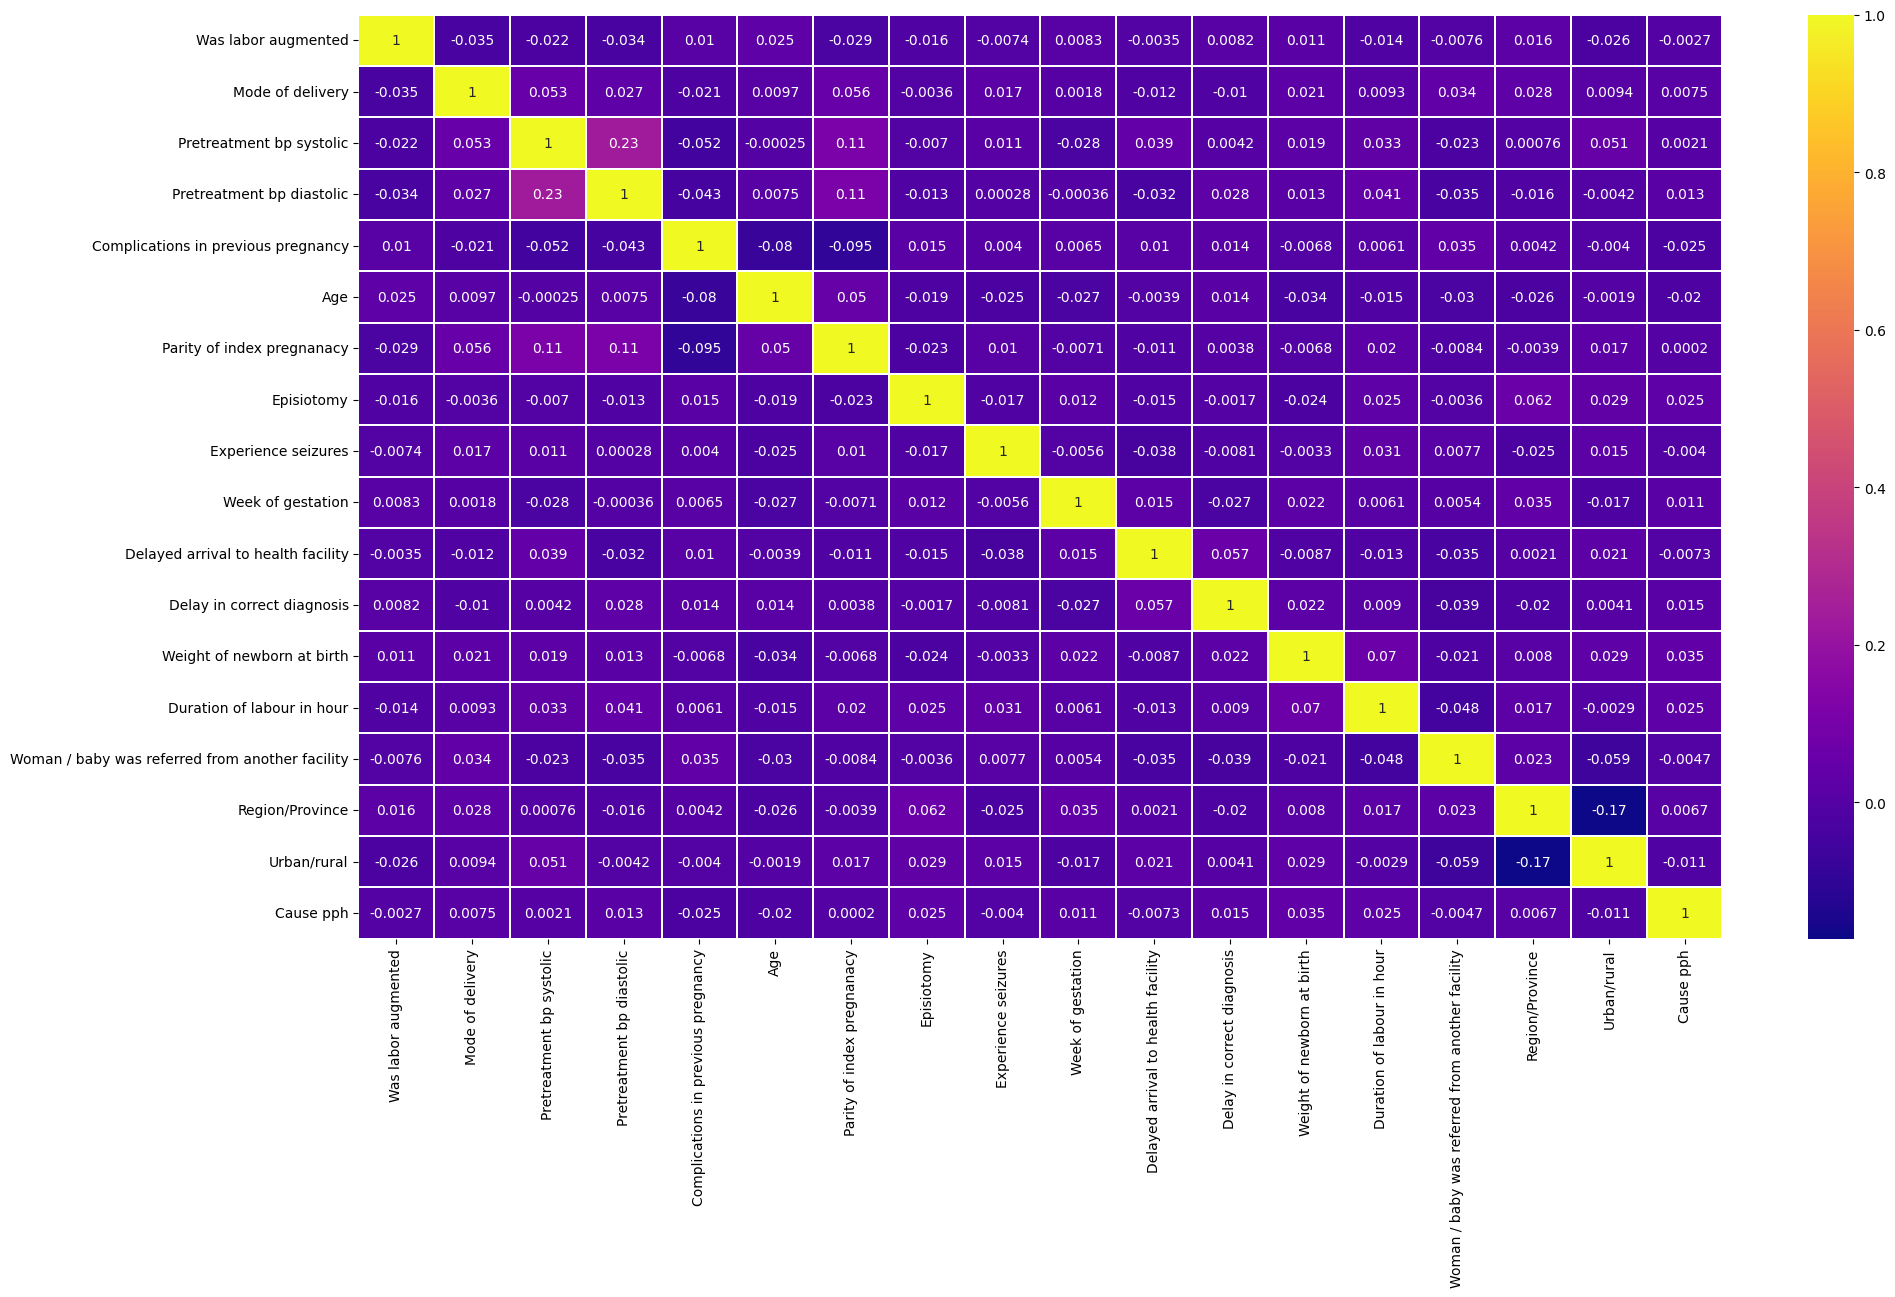

In [15]:
## displaying a correlation map for visualization of Correlation between variables to show their importance
plt.figure(figsize = (22,12))
sns.heatmap(df.corr(), linewidths = 0.2, annot=True, cmap = "plasma") 

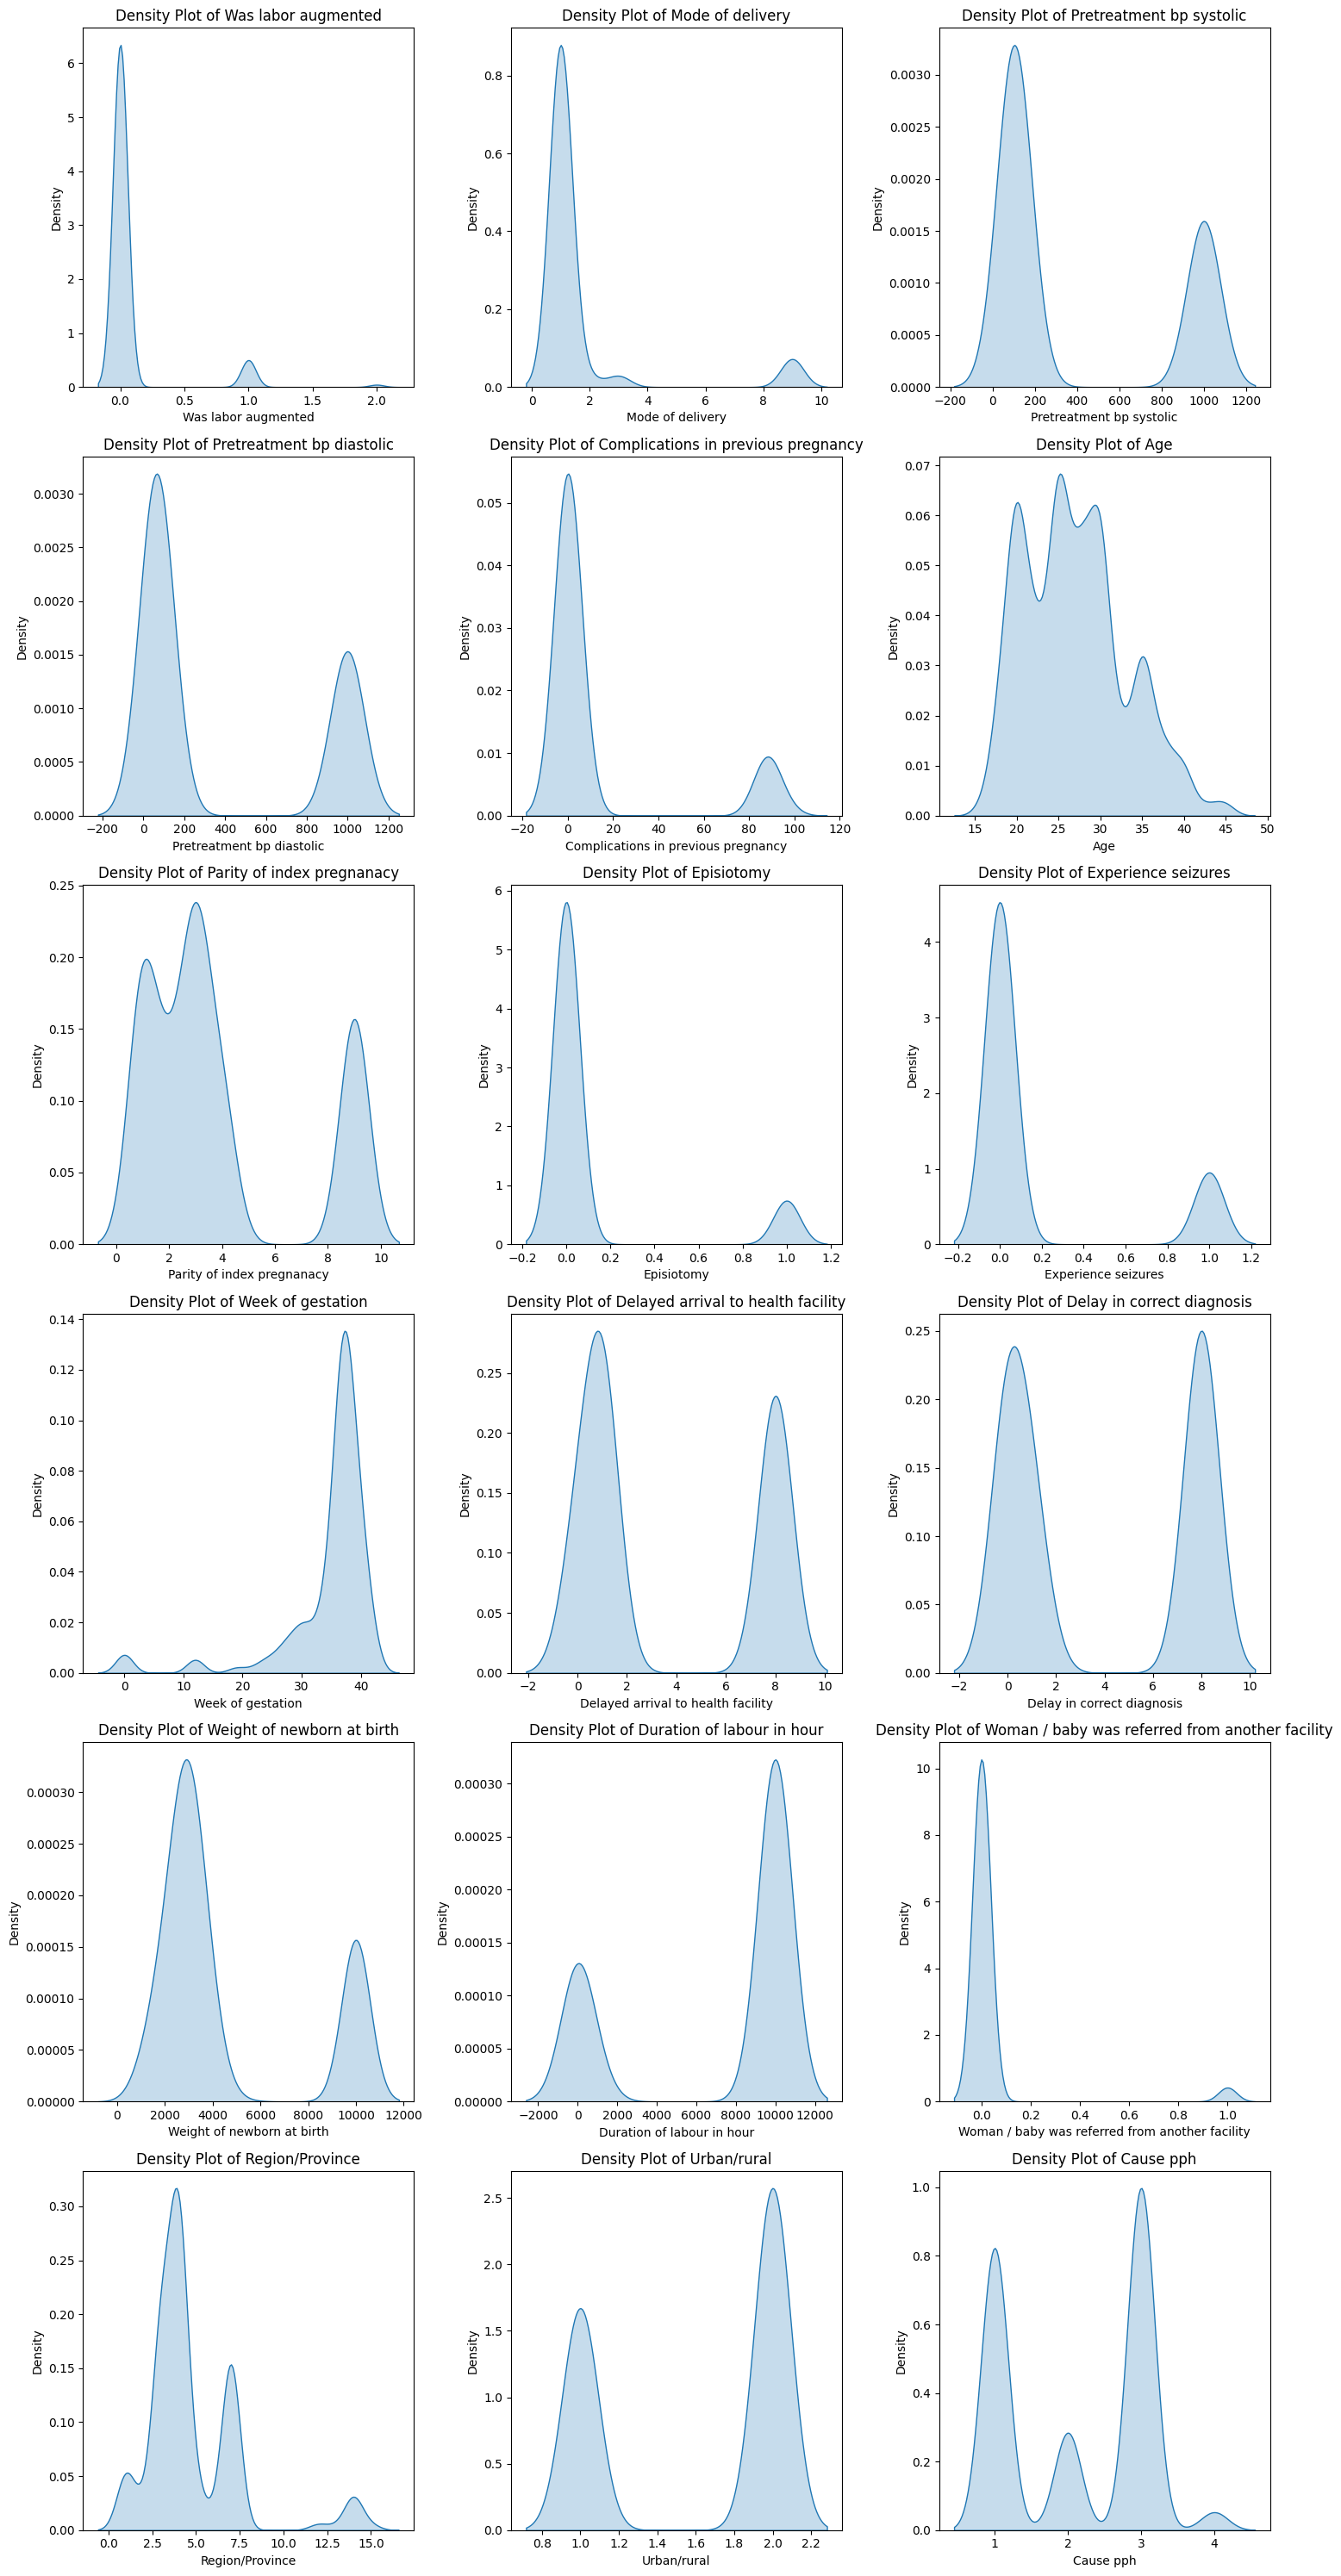

In [40]:
import math


# Select numeric columns only
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Determine the grid size (e.g., 3 columns per row)
num_cols = 3
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each numeric column and its corresponding subplot
for i, column in enumerate(numeric_columns):
    sns.kdeplot(df[column].dropna(), shade=True, ax=axes[i])
    axes[i].set_title(f'Density Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

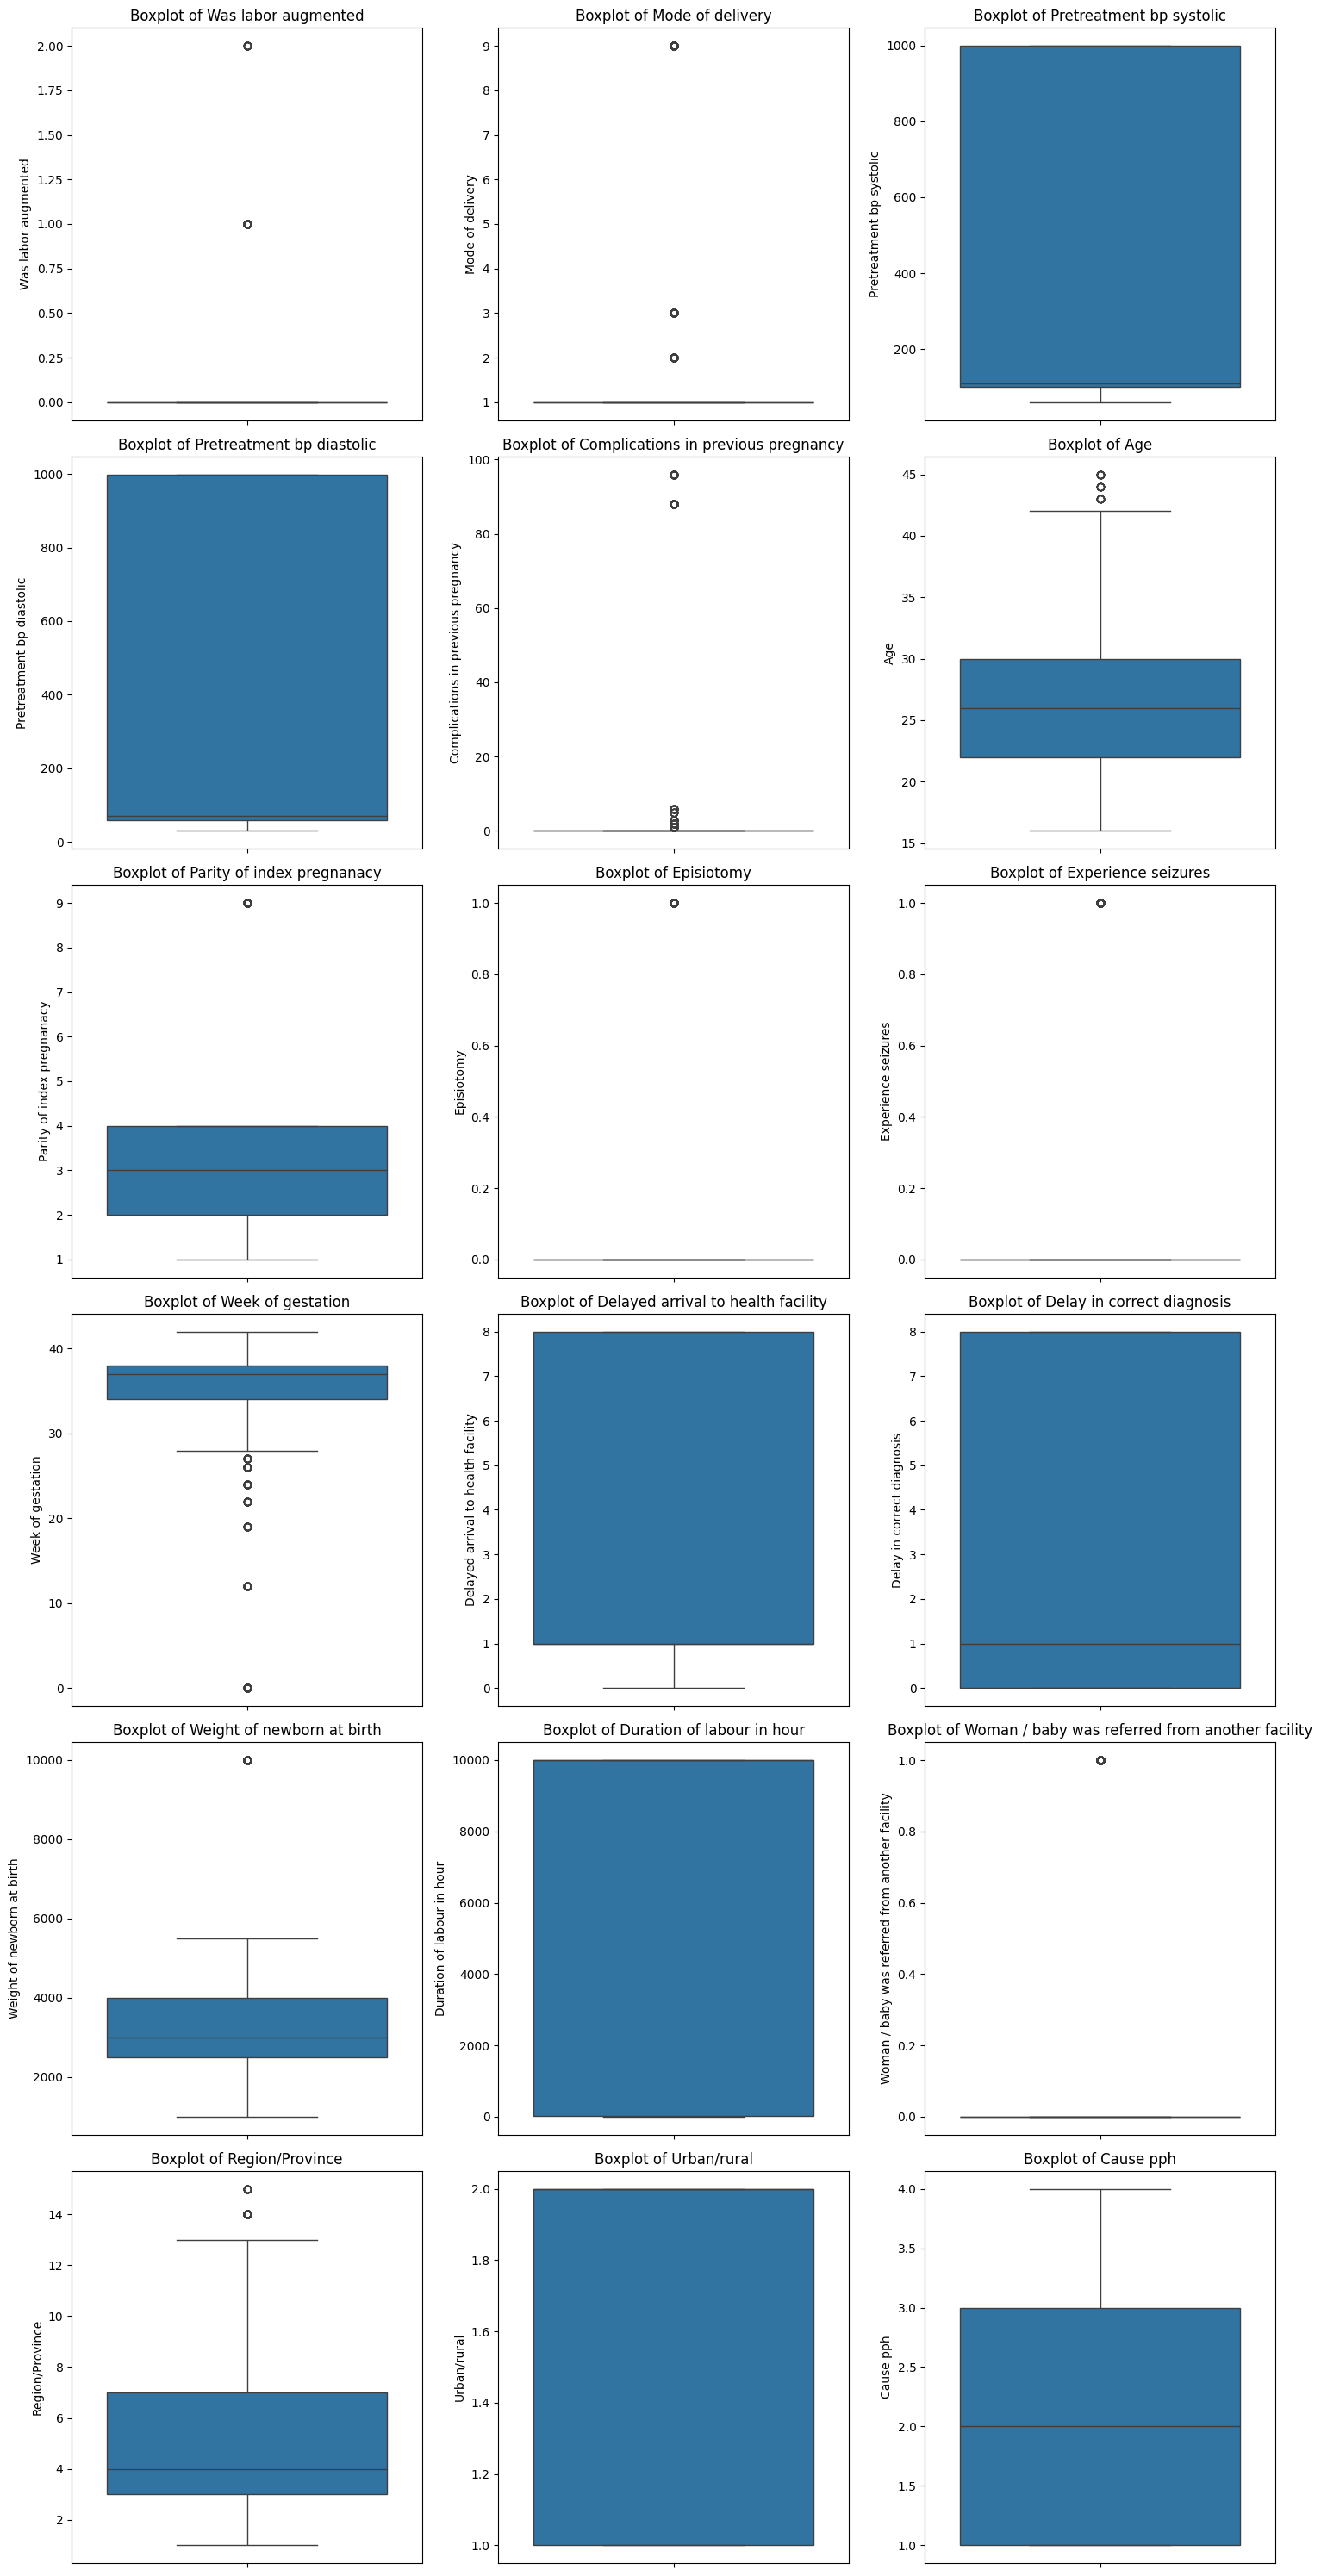

In [43]:
import math

# Determine the grid size (e.g., 3 columns per row)
num_cols = 3
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through each numeric column and its corresponding subplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

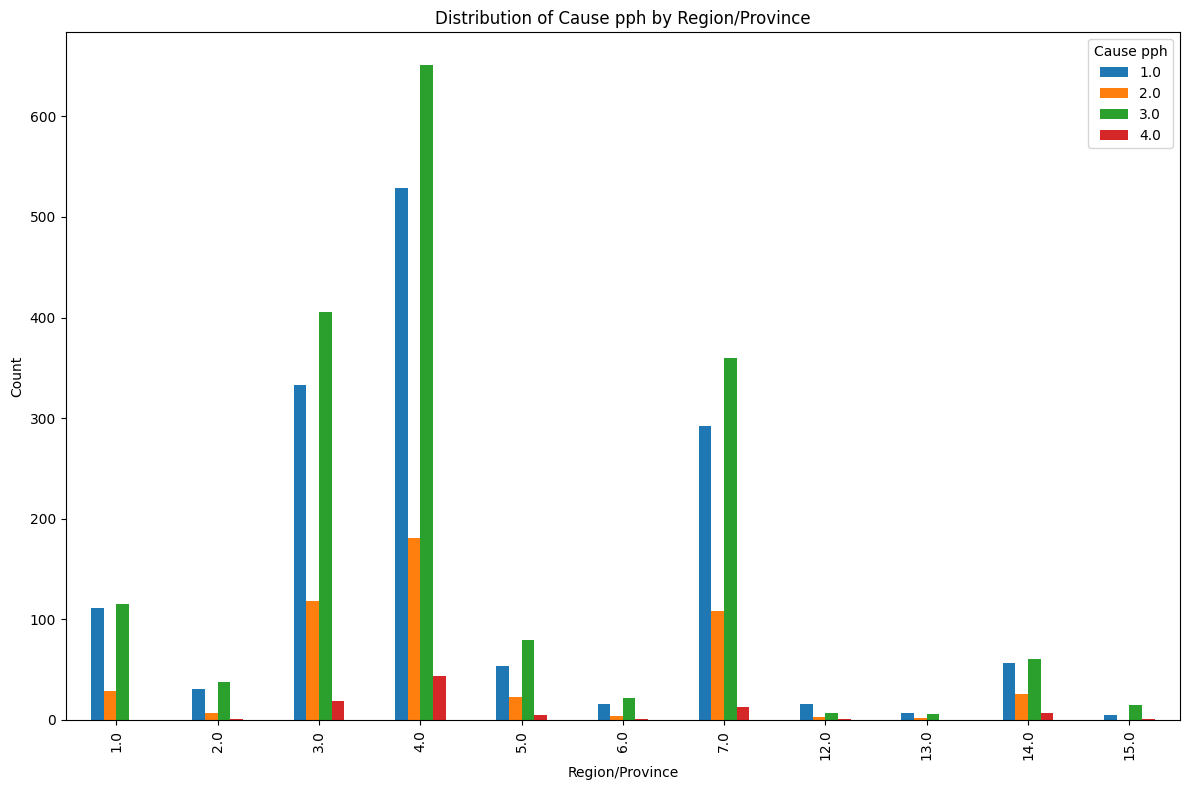

In [45]:
# Group by 'Region/Province' and 'Cause pph' and count occurrences
cause_by_region = df.groupby(['Region/Province', 'Cause pph']).size().unstack()

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
cause_by_region.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Distribution of Cause pph by Region/Province')
ax.set_xlabel('Region/Province')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cause pph')
plt.tight_layout()
plt.show()


In [16]:
# Separate features and target variable
target_column = 'Cause pph'
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]               # Target variable

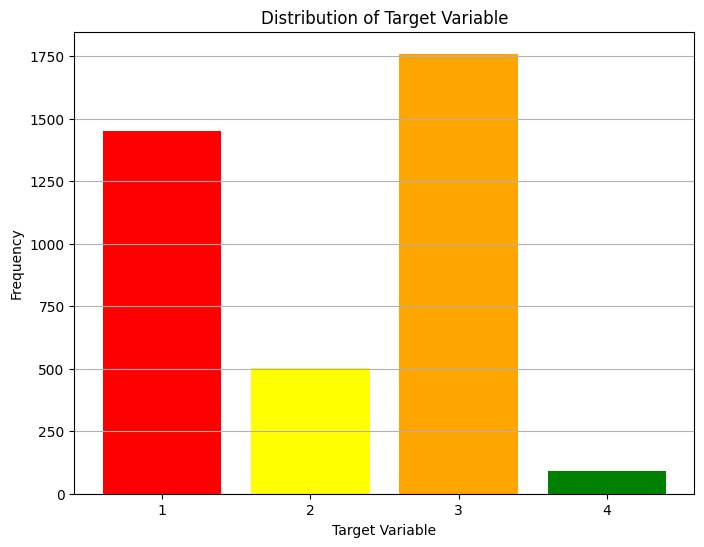

In [17]:
# visualize the target variable
# Define colors for each class
colors = ['red', 'yellow', 'orange', 'green']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [18]:
# Apply SMOTE to balance the dataset class variables 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

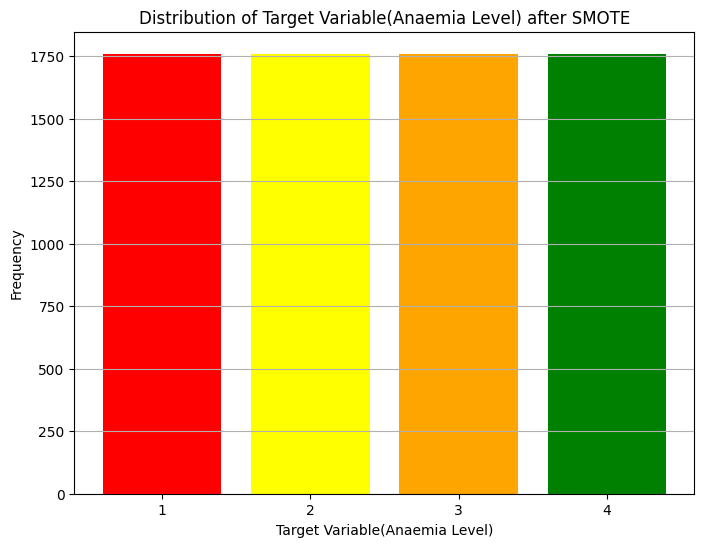

In [19]:
# Define colors for each class
colors = ['red', 'yellow', 'orange', 'green']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable(Anaemia Level)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable(Anaemia Level) after SMOTE')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [20]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
df.columns 

Index(['Was labor augmented', 'Mode of delivery', 'Pretreatment bp systolic',
       'Pretreatment bp diastolic', 'Complications in previous pregnancy',
       'Age', 'Parity of index pregnanacy', 'Episiotomy',
       'Experience seizures', 'Week of gestation',
       'Delayed arrival to health facility', 'Delay in correct diagnosis',
       'Weight of newborn at birth', 'Duration of labour in hour',
       'Woman / baby was referred from another facility', 'Region/Province',
       'Urban/rural', 'Cause pph'],
      dtype='object')

In [22]:
# Define your feature columns (example given, excluding the target column 'Anemia level')
feature_columns = ['Was labor augmented', 'Mode of delivery', 'Pretreatment bp systolic', 'Pretreatment bp diastolic', 'Complications in previous pregnancy',
                   'Age', 'Parity of index pregnanacy', 'Episiotomy', 'Experience seizures', 'Week of gestation',
                   'Delayed arrival to health facility', 'Delay in correct diagnosis', 'Weight of newborn at birth', 'Duration of labour in hour',
                   'Woman / baby was referred from another facility', 'Region/Province','Urban/rural']

# Ensure X_train is a DataFrame with the correct number of columns
X_train = pd.DataFrame(X_train, columns=feature_columns)

# Calculate mutual information scores
mi = mutual_info_classif(X_train, y_train)

# Convert mutual information scores to a Pandas Series
mi = pd.Series(mi)

# Label the Series with feature names
mi.index = X_train.columns

# Sort the Series
mi_sorted = mi.sort_values(ascending=False)

# display the sorted Series
mi_sorted

Age                                                0.313083
Week of gestation                                  0.300713
Parity of index pregnanacy                         0.229705
Region/Province                                    0.217804
Pretreatment bp systolic                           0.208458
Delayed arrival to health facility                 0.181318
Weight of newborn at birth                         0.180401
Pretreatment bp diastolic                          0.175732
Delay in correct diagnosis                         0.160112
Urban/rural                                        0.108610
Complications in previous pregnancy                0.103651
Duration of labour in hour                         0.084053
Mode of delivery                                   0.083946
Experience seizures                                0.083333
Episiotomy                                         0.075591
Was labor augmented                                0.040799
Woman / baby was referred from another f

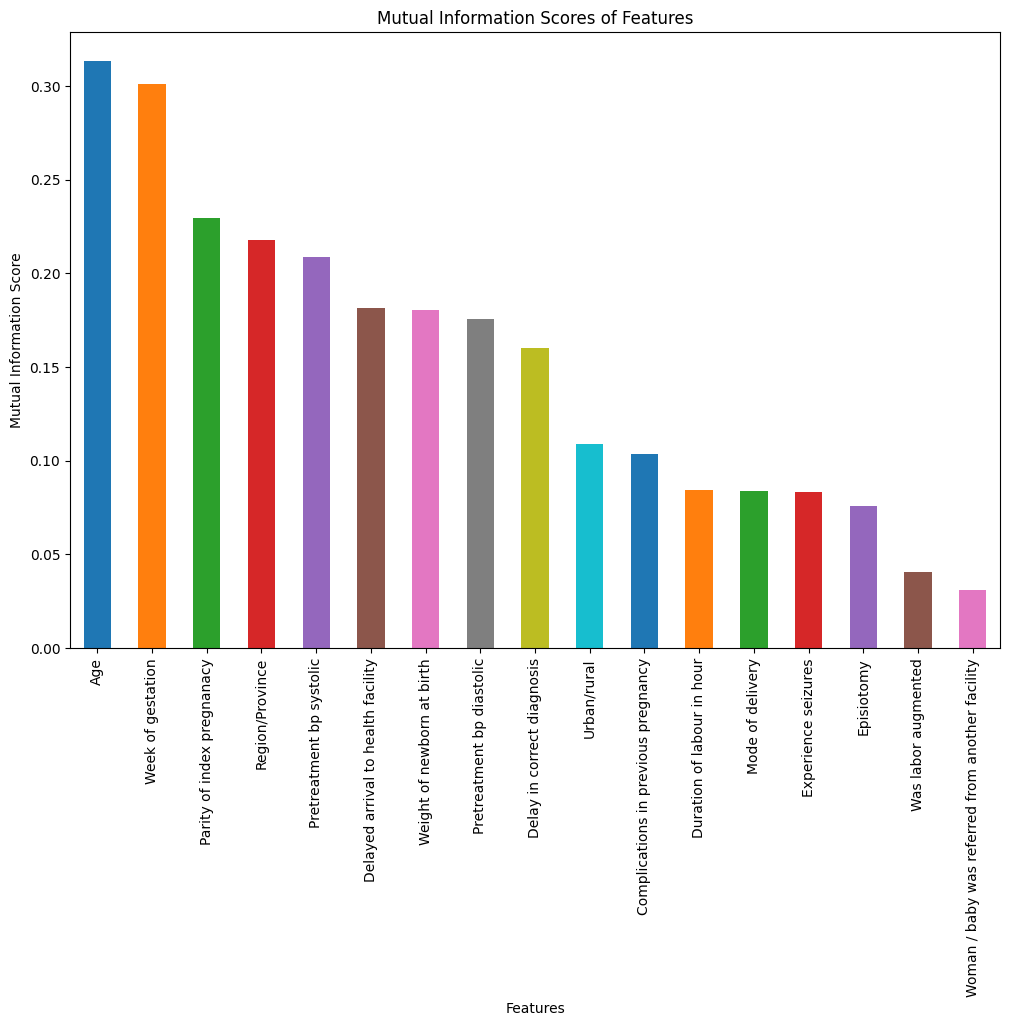

In [23]:
# Plot the sorted Series with different color palettes
palettes = sns.color_palette('tab10', n_colors=len(mi_sorted))
plt.figure(figsize=(12, 8))
mi_sorted.plot(kind='bar', color=palettes)
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the standardized training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.6600
Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.34      0.36       237
         2.0       0.85      0.68      0.76       274
         3.0       0.51      0.64      0.57       286
         4.0       0.93      0.96      0.94       259

    accuracy                           0.66      1056
   macro avg       0.67      0.65      0.66      1056
weighted avg       0.67      0.66      0.66      1056

Test Accuracy: 0.6364
Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.34      0.39       288
         2.0       0.80      0.66      0.73       274
         3.0       0.45      0.63      0.52       251
         4.0       0.91      0.96      0.93       243

    accuracy                           0.64      1056
   macro avg       0.65      0.65      0.64      1056
weighted avg       0.65      0.64      0.63      1056



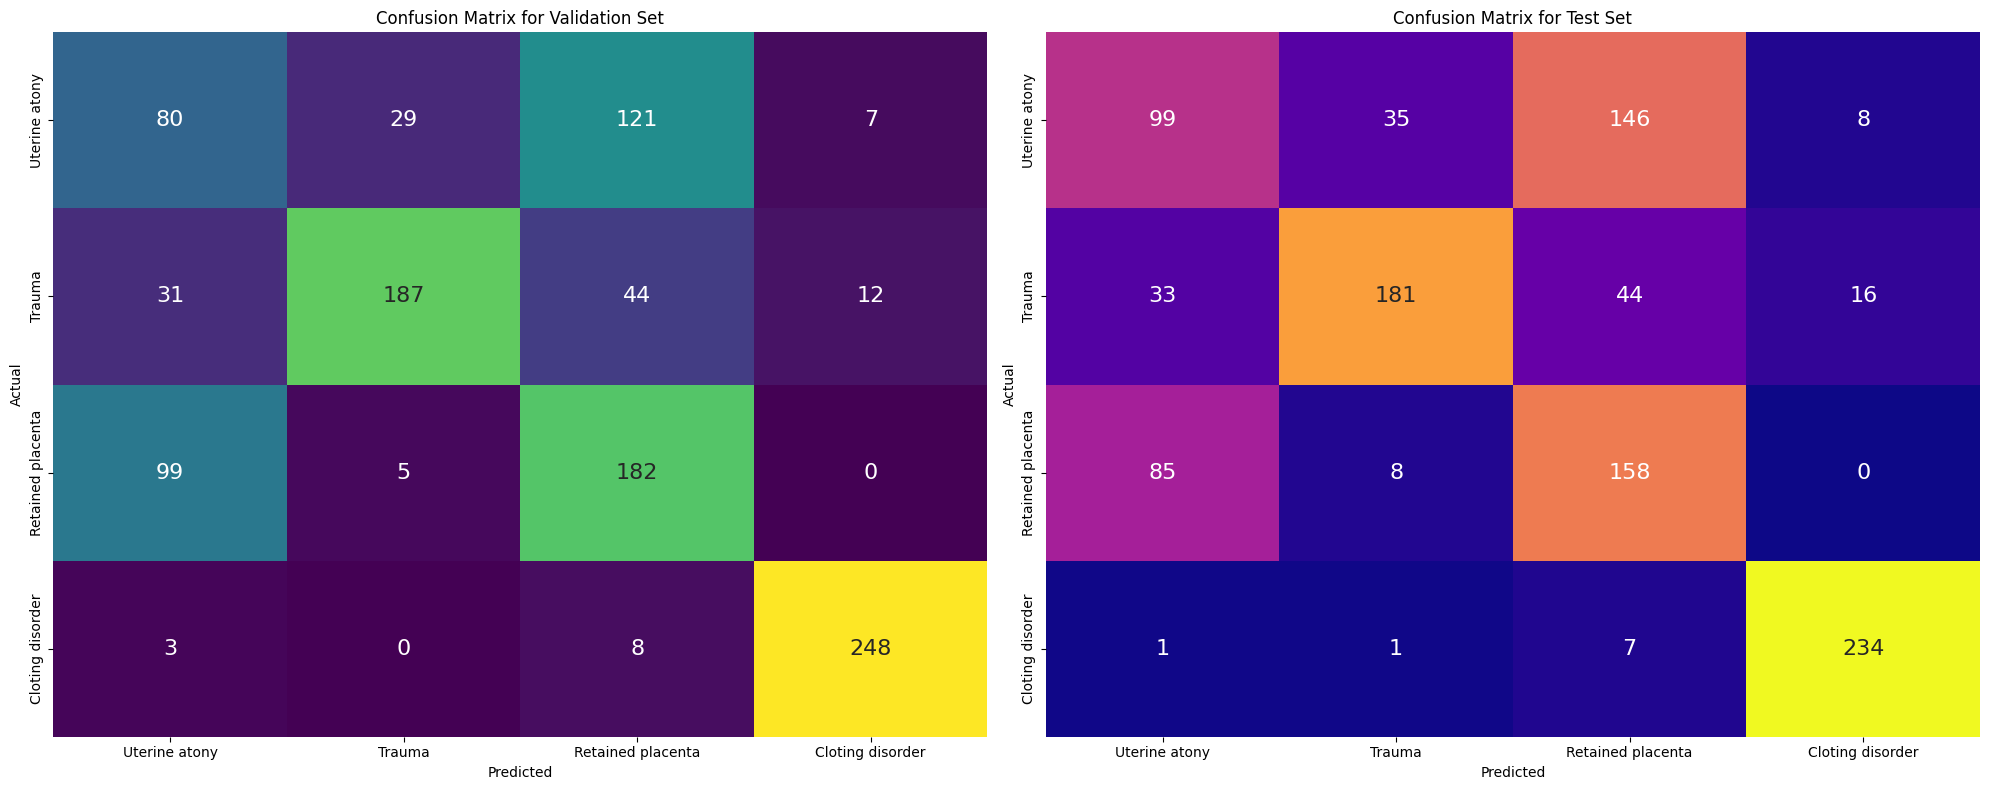

In [26]:
# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Calculate the confusion matrix for the validation set
val_cm = confusion_matrix(y_val, y_val_pred)

# Predict on the test set
y_test_pred = rf_clf.predict(X_test)

# Calculate the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Define class names
class_names = ['Uterine atony', 'Trauma', 'Retained placenta', 'Cloting disorder']

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the confusion matrix for the validation set
sns.heatmap(val_cm, annot=True, fmt='d', cmap="viridis", cbar=False, ax=axes[0],
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Validation Set')

# Plot the confusion matrix for the test set
sns.heatmap(test_cm, annot=True, fmt='d', cmap="plasma", cbar=False, ax=axes[1],
            xticklabels=class_names, yticklabels=class_names,annot_kws={"size": 16})
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix for Test Set')

# Adjust layout
plt.tight_layout()
plt.show()

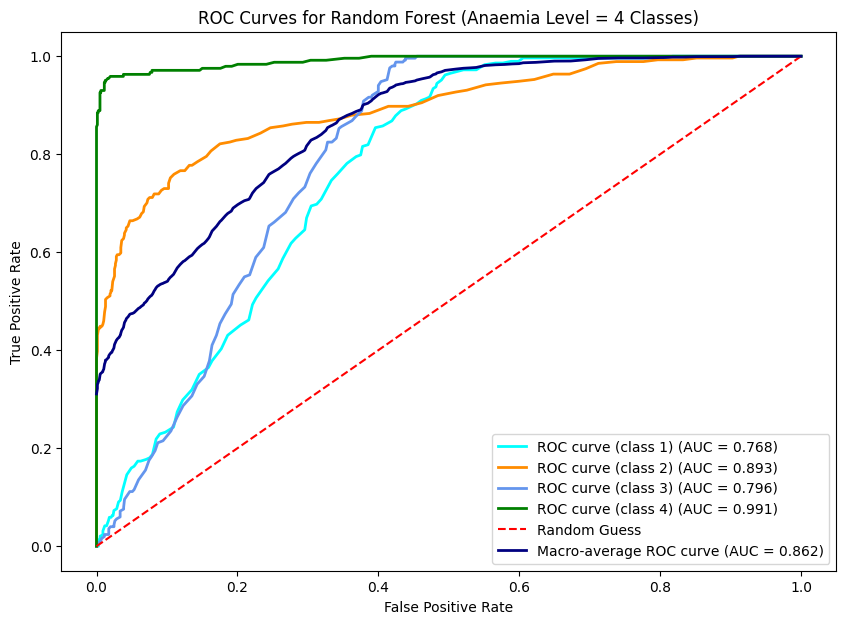

In [27]:
classes = [1, 2, 3, 4]

# Predict probabilities for each class on the validation set
y_score = rf_clf.predict_proba(X_test)

# Binarize the true labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 7))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.3f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

# Calculate and plot the macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, color='navy', linestyle='-', linewidth=2,
         label=f'Macro-average ROC curve (AUC = {macro_auc:.3f})')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest (Anaemia Level = 4 Classes)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [28]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.5634
Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.32      0.33       237
         2.0       0.60      0.57      0.59       274
         3.0       0.50      0.48      0.49       286
         4.0       0.78      0.86      0.82       259

    accuracy                           0.56      1056
   macro avg       0.55      0.56      0.56      1056
weighted avg       0.56      0.56      0.56      1056

Test Accuracy: 0.5199
Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.39      0.32      0.35       288
         2.0       0.54      0.50      0.52       274
         3.0       0.38      0.43      0.40       251
         4.0       0.77      0.87      0.82       243

    accuracy                           0.52      1056
   macro avg       0.52      0.53      0.52      1056
weighted avg       0.51      0.52      0.51      1056



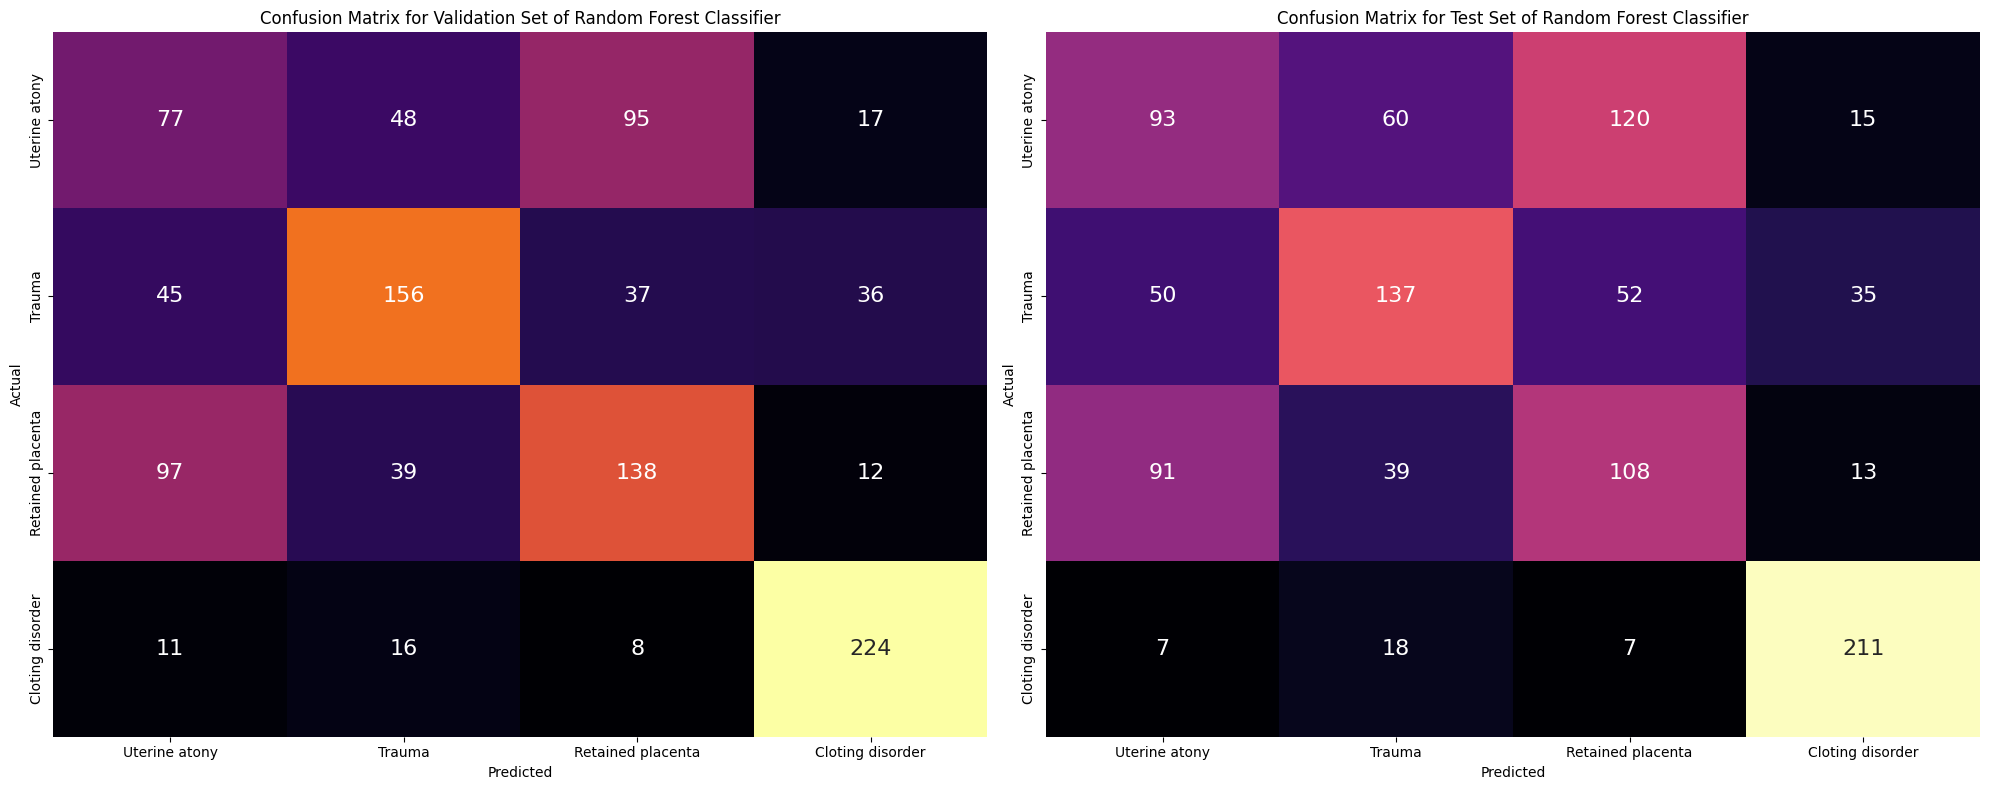

In [29]:
# Calculate the confusion matrix for the validation set
val_cm = confusion_matrix(y_val, y_val_pred)

# Calculate the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Set up the matplotlib figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the confusion matrix for the validation set
sns.heatmap(val_cm, annot=True, fmt='d', cmap="inferno", cbar=False, ax=axes[0],
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})  # Adjust fontsize here
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix for Validation Set of decision tree Classifier')

# Plot the confusion matrix for the test set
sns.heatmap(test_cm, annot=True, fmt='d', cmap="magma", cbar=False, ax=axes[1],
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})  # Adjust fontsize here
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix for Test Set of decision tree Classifier')

# Adjust layout
plt.tight_layout()
plt.show()

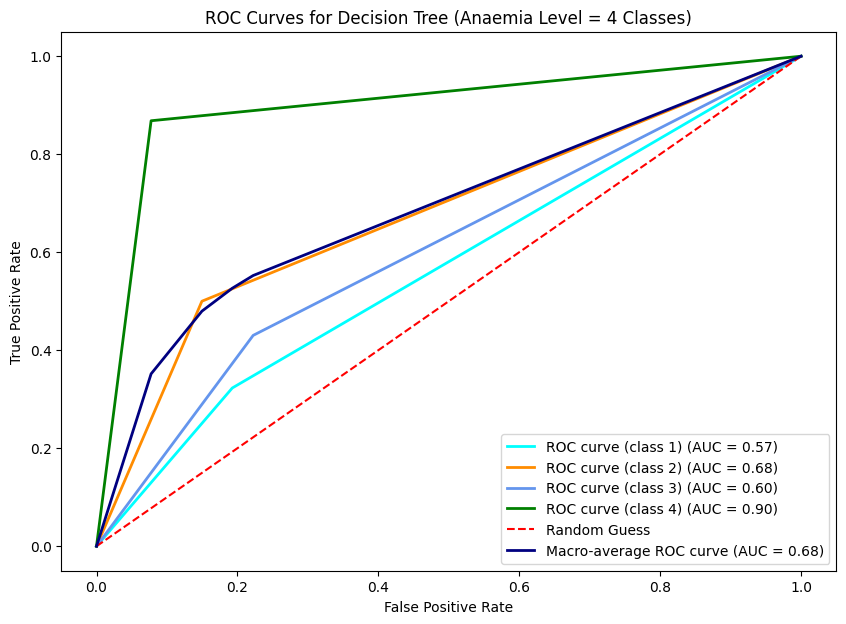

In [30]:
# Predict probabilities for each class on the test set
y_score = dt.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 7))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # There are 4 classes (1, 2, 3, 4)
    # Binarize the true labels for class i
    y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])[:, i]
    # Compute ROC curve and ROC area
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i+1}) (AUC = {roc_auc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

# Calculate and plot the macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, color='navy', linestyle='-', linewidth=2,
         label=f'Macro-average ROC curve (AUC = {macro_auc:.2f})')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree (Anaemia Level = 4 Classes)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = logreg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Logistic Regression - Validation Accuracy: {val_accuracy:.4f}')
print('Logistic Regression - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Logistic Regression - Test Accuracy: {test_accuracy:.4f}')
print('Logistic Regression - Test Classification Report:')
print(test_report)

Logistic Regression - Validation Accuracy: 0.2926
Logistic Regression - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.24      0.15      0.18       237
         2.0       0.31      0.34      0.33       274
         3.0       0.30      0.21      0.25       286
         4.0       0.29      0.47      0.36       259

    accuracy                           0.29      1056
   macro avg       0.29      0.29      0.28      1056
weighted avg       0.29      0.29      0.28      1056

Logistic Regression - Test Accuracy: 0.2983
Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.31      0.14      0.19       288
         2.0       0.32      0.38      0.35       274
         3.0       0.22      0.19      0.20       251
         4.0       0.32      0.51      0.39       243

    accuracy                           0.30      1056
   macro avg       0.29      0.30      

In [32]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = nb.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Naive Bayes - Validation Accuracy: {val_accuracy:.4f}')
print('Naive Bayes - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Naive Bayes - Test Accuracy: {test_accuracy:.4f}')
print('Naive Bayes - Test Classification Report:')
print(test_report)


Naive Bayes - Validation Accuracy: 0.3466
Naive Bayes - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.26      0.14      0.18       237
         2.0       0.34      0.39      0.36       274
         3.0       0.36      0.21      0.26       286
         4.0       0.37      0.64      0.47       259

    accuracy                           0.35      1056
   macro avg       0.33      0.35      0.32      1056
weighted avg       0.34      0.35      0.32      1056

Naive Bayes - Test Accuracy: 0.3286
Naive Bayes - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.34      0.14      0.20       288
         2.0       0.33      0.38      0.35       274
         3.0       0.27      0.18      0.21       251
         4.0       0.35      0.65      0.45       243

    accuracy                           0.33      1056
   macro avg       0.32      0.34      0.30      1056
weighted avg     

In [33]:
from sklearn.svm import SVC

# Train SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'SVM - Validation Accuracy: {val_accuracy:.4f}')
print('SVM - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'SVM - Test Accuracy: {test_accuracy:.4f}')
print('SVM - Test Classification Report:')
print(test_report)


SVM - Validation Accuracy: 0.2462
SVM - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.22      0.52      0.31       237
         2.0       0.29      0.32      0.31       274
         3.0       0.00      0.00      0.00       286
         4.0       0.24      0.19      0.21       259

    accuracy                           0.25      1056
   macro avg       0.19      0.26      0.21      1056
weighted avg       0.19      0.25      0.20      1056

SVM - Test Accuracy: 0.3030
SVM - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.28      0.52      0.36       288
         2.0       0.33      0.40      0.36       274
         3.0       0.00      0.00      0.00       251
         4.0       0.33      0.25      0.28       243

    accuracy                           0.30      1056
   macro avg       0.23      0.29      0.25      1056
weighted avg       0.24      0.30      0.26      

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Random Forest - Validation Accuracy: {val_accuracy:.4f}')
print('Random Forest - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Random Forest - Test Accuracy: {test_accuracy:.4f}')
print('Random Forest - Test Classification Report:')
print(test_report)


Random Forest - Validation Accuracy: 0.6705
Random Forest - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.40      0.37      0.39       237
         2.0       0.84      0.69      0.76       274
         3.0       0.53      0.64      0.58       286
         4.0       0.93      0.95      0.94       259

    accuracy                           0.67      1056
   macro avg       0.67      0.66      0.67      1056
weighted avg       0.68      0.67      0.67      1056

Random Forest - Test Accuracy: 0.6345
Random Forest - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.38      0.41       288
         2.0       0.80      0.66      0.72       274
         3.0       0.43      0.59      0.50       251
         4.0       0.92      0.96      0.94       243

    accuracy                           0.63      1056
   macro avg       0.65      0.65      0.64      1056
weighted 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'KNN - Validation Accuracy: {val_accuracy:.4f}')
print('KNN - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'KNN - Test Accuracy: {test_accuracy:.4f}')
print('KNN - Test Classification Report:')
print(test_report)


KNN - Validation Accuracy: 0.5492
KNN - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.40      0.51      0.45       237
         2.0       0.55      0.66      0.60       274
         3.0       0.42      0.22      0.29       286
         4.0       0.77      0.83      0.80       259

    accuracy                           0.55      1056
   macro avg       0.54      0.56      0.53      1056
weighted avg       0.54      0.55      0.53      1056

KNN - Test Accuracy: 0.5473
KNN - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.43      0.45      0.44       288
         2.0       0.52      0.67      0.58       274
         3.0       0.41      0.22      0.28       251
         4.0       0.77      0.87      0.82       243

    accuracy                           0.55      1056
   macro avg       0.53      0.55      0.53      1056
weighted avg       0.53      0.55      0.53      

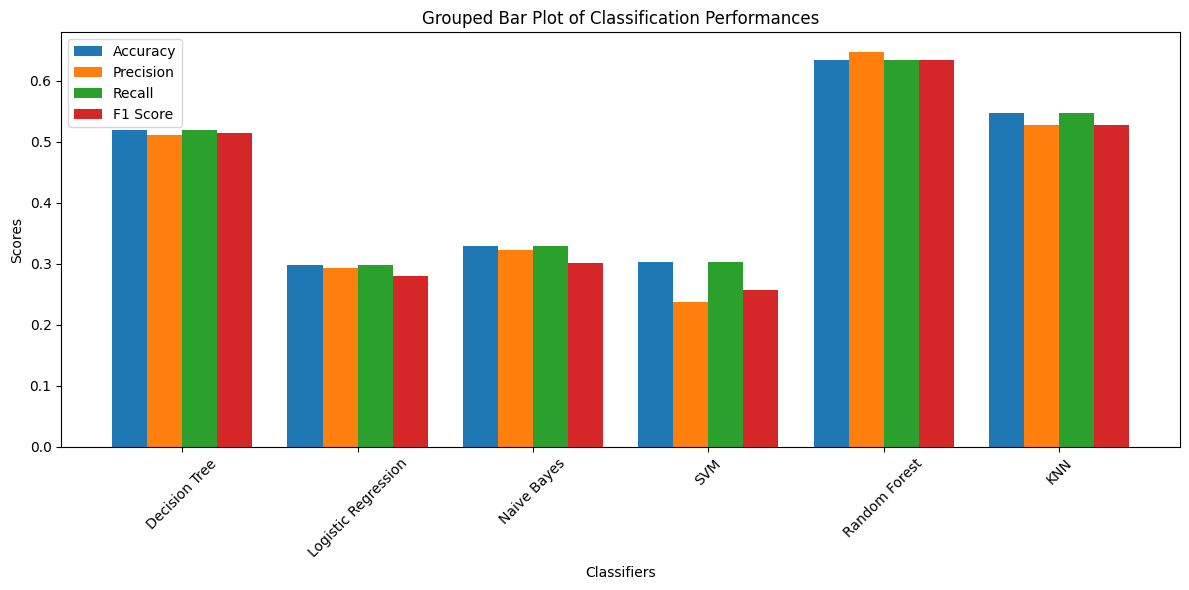

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# List of models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Initialize a dictionary to store performance metrics
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Iterate over each model to train, predict, and collect metrics
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store metrics
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)

# Convert to numpy array for plotting
metrics_array = np.array([performance_metrics['Accuracy'],
                          performance_metrics['Precision'],
                          performance_metrics['Recall'],
                          performance_metrics['F1 Score']])

# Create the grouped bar plot
model_names = list(models.keys())
metric_names = list(performance_metrics.keys())
n_metrics = len(metric_names)
n_models = len(model_names)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.2
indices = np.arange(n_models)

# Plot bars for each metric
for i, metric in enumerate(metric_names):
    ax.bar(indices + i * bar_width, metrics_array[i], bar_width, label=metric)

# Add labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Grouped Bar Plot of Classification Performances')
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()